# Exploratory Data Analysis on the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix


In [3]:
# Load the dataset
file_path = "C:/Users/Venkateswarlu/Desktop/Sem 5/Machine Learning/movies (1).csv"
data = pd.read_csv(file_path)
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [6]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [7]:
data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

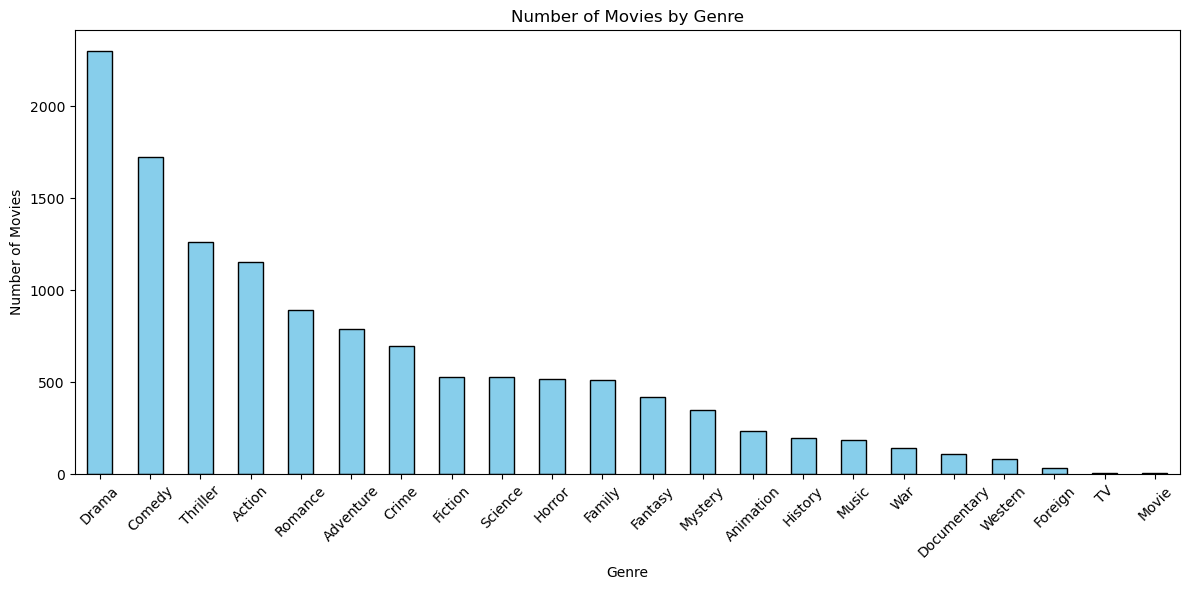

In [8]:
# Split genres into individual entries and count occurrences
genres_series = data['genres'].str.split(' ').explode().value_counts()

# Plot the genre distribution
plt.figure(figsize=(12, 6))
genres_series.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [10]:
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')  # Or use .fillna(method='ffill')

In [11]:
data.isnull().sum()

index                   0
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
dtype: int64

In [12]:
# Define numerical columns for outlier detection (only numeric types)
numerical_columns = [i for i in data.select_dtypes(include=['number']).columns]
# Initialize dictionaries to store outliers
z_score_outliers = {}
iqr_outliers = {}

# Z-score method for outlier detection
from scipy import stats

for col in numerical_columns:
    non_nan_data = data[col].dropna()  # Drop NaNs
    z_scores = stats.zscore(non_nan_data)
    outliers_z = non_nan_data.index[abs(z_scores) > 3]
    z_score_outliers[col] = data.loc[outliers_z, col]

# IQR method for outlier detection
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    iqr_outliers[col] = outliers_iqr

# Print results
print("Z-score Outliers:")
for col, outliers in z_score_outliers.items():
    print(f"{col}: {len(outliers)} outliers")

print("\nIQR Outliers:")
for col, outliers in iqr_outliers.items():
    print(f"{col}: {len(outliers)} outliers")

Z-score Outliers:
index: 0 outliers
budget: 103 outliers
id: 125 outliers
popularity: 53 outliers
revenue: 118 outliers
runtime: 97 outliers
vote_average: 81 outliers
vote_count: 126 outliers

IQR Outliers:
index: 0 outliers
budget: 321 outliers
id: 704 outliers
popularity: 275 outliers
revenue: 472 outliers
runtime: 182 outliers
vote_average: 156 outliers
vote_count: 504 outliers


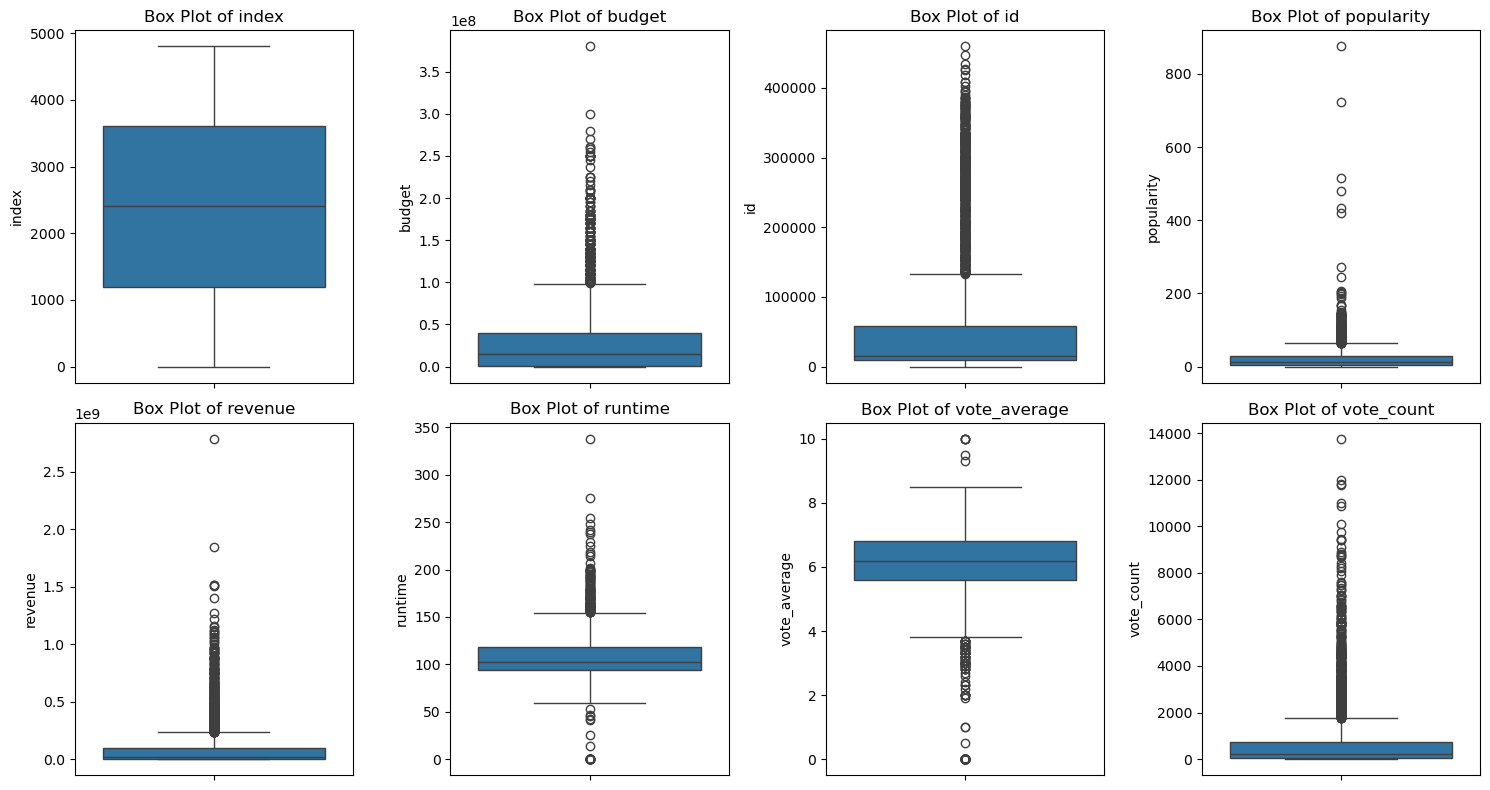

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot to visualize IQR outliers for each column
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,4, i)
    sns.boxplot(data[col].dropna())
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()




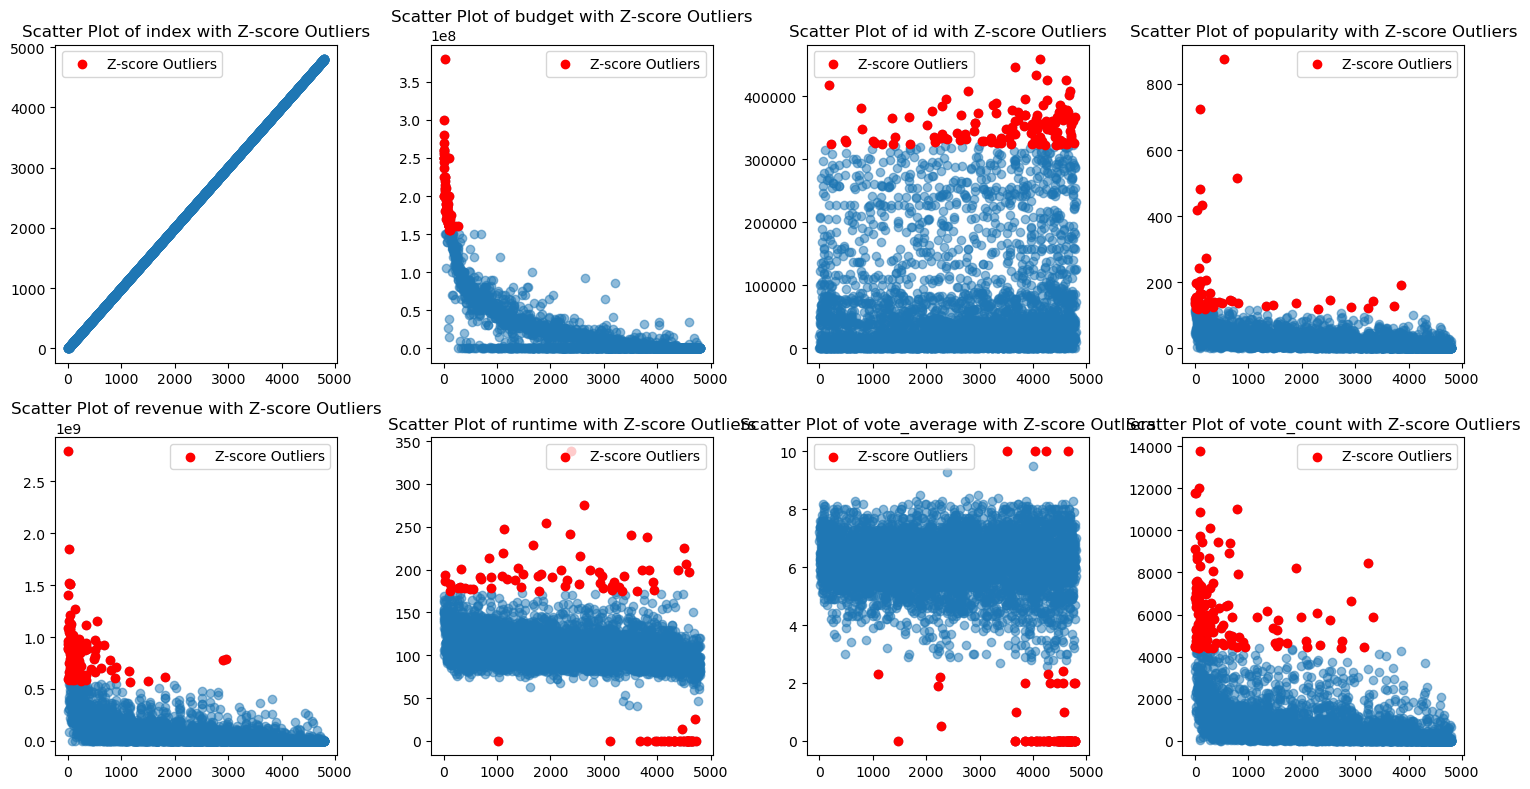

In [14]:
# Scatter Plot for each feature against index to highlight Z-score outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    plt.scatter(data.index, data[col], alpha=0.5)
    plt.scatter(z_score_outliers[col].index, z_score_outliers[col], color='red', label='Z-score Outliers')
    plt.title(f'Scatter Plot of {col} with Z-score Outliers')
    plt.legend()
plt.tight_layout()
plt.show()

Box plots after outlier removal:


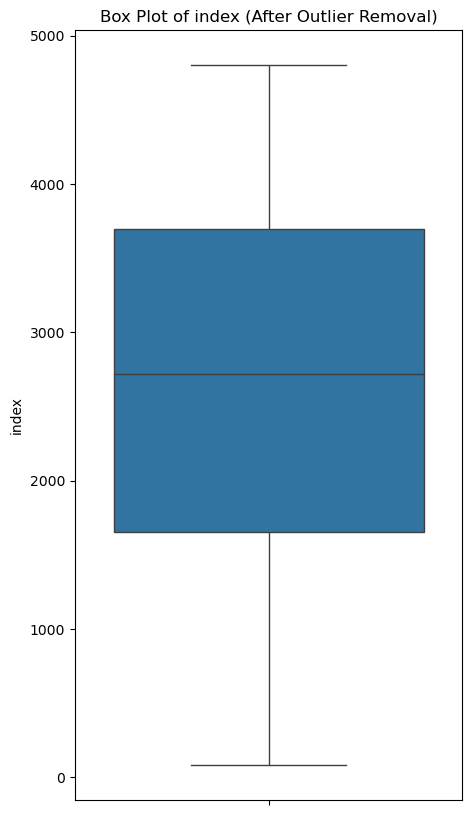

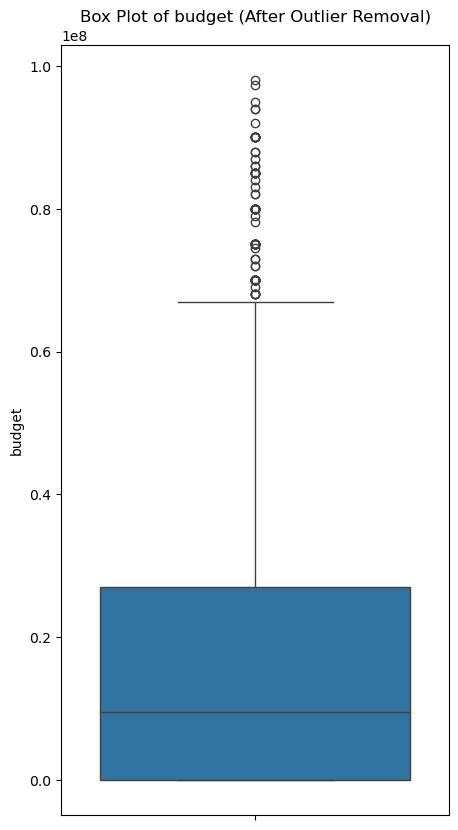

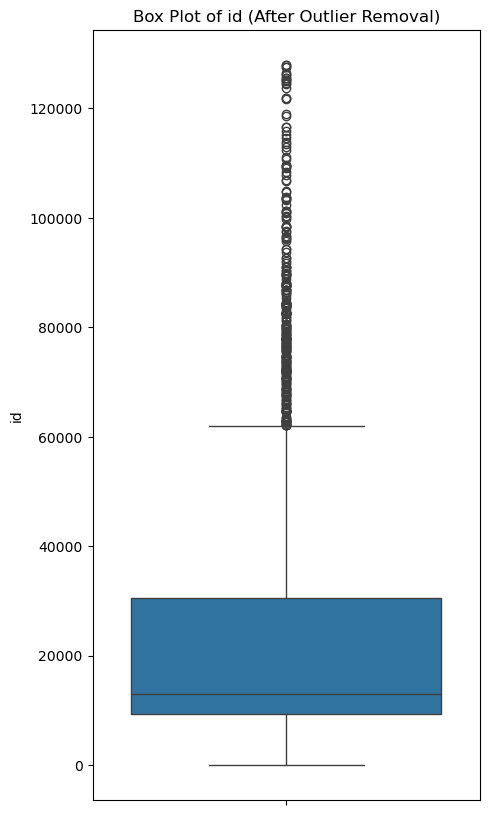

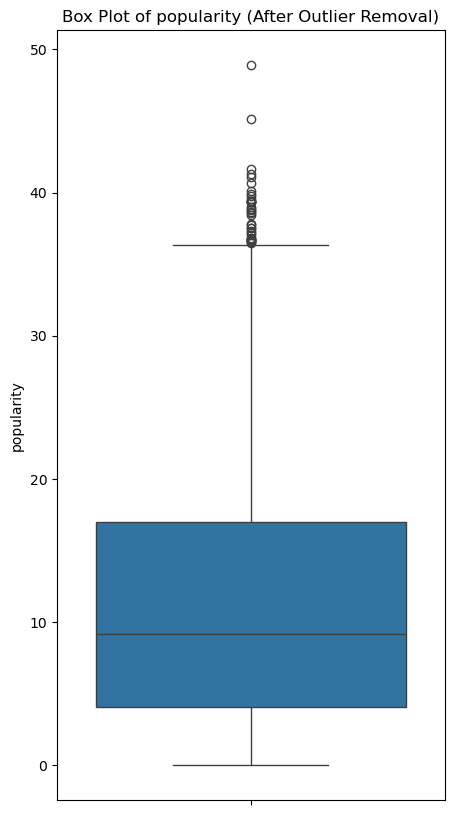

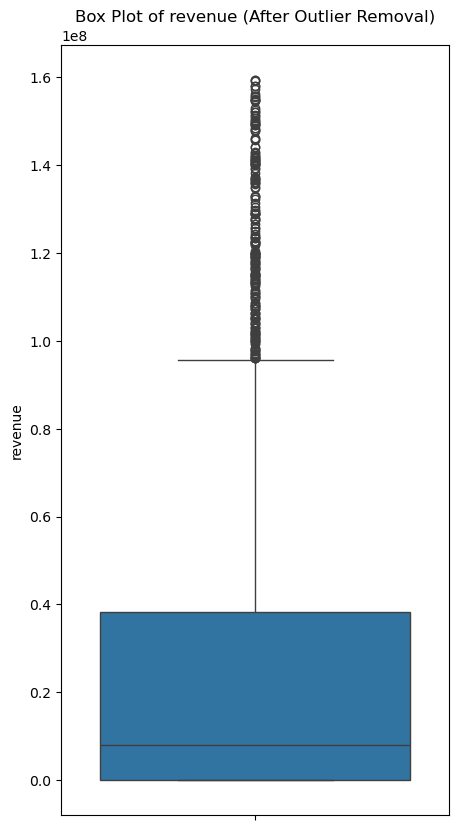

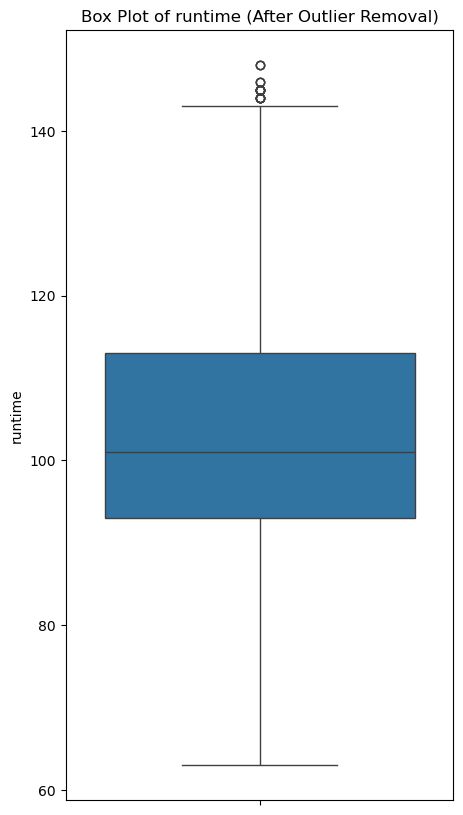

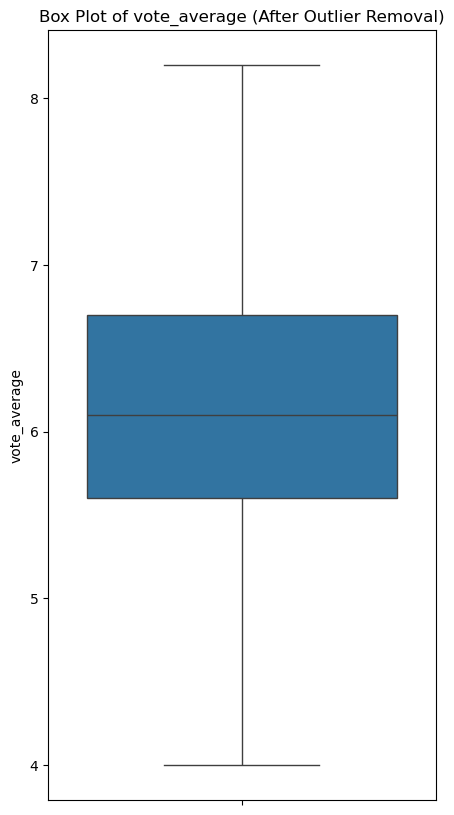

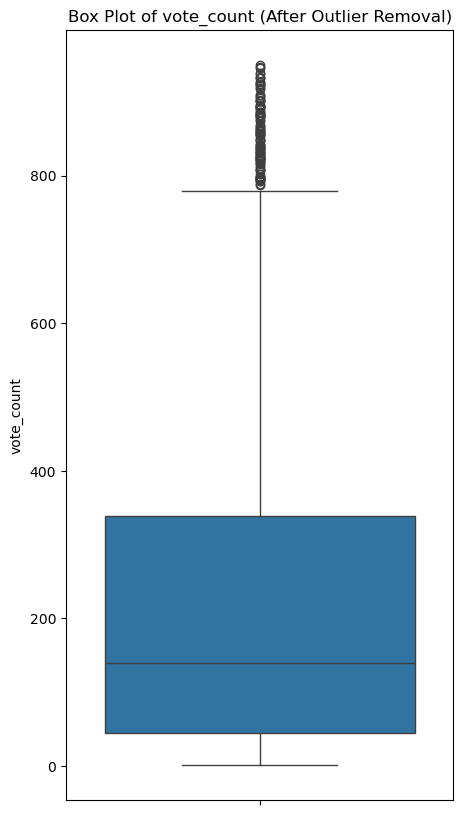

Original data shape: (4803, 24)
Cleaned data shape: (2913, 24)


In [15]:


# Identify numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, cols, multiplier=1.5):
    for col in cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Filter out rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Remove outliers for numerical columns in the dataset
data_cleaned = remove_outliers_iqr(data, numerical_cols)

# Plot box plots for each numerical feature after outlier removal (vertical orientation)
print("Box plots after outlier removal:")
for col in numerical_cols:
    plt.figure(figsize=(5, 10))
    sns.boxplot(y=data_cleaned[col], orient="v")
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
    plt.show()

# Display the shape of the dataset before and after outlier removal
print("Original data shape:", data.shape)
print("Cleaned data shape:", data_cleaned.shape)


In [16]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [17]:
# replacing the null valuess with null string
for feature in selected_features:
  data[feature] = data[feature].fillna('')

In [18]:
# combining all the 5 selected features
combined_features = data['genres']+' '+data['keywords']+' '+data['tagline']+' '+data['cast']+' '+data['director']

In [19]:
combined_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance Unknown A newlywed couple's hon...
4800    Comedy Drama Romance TV Movie date love at fir...
4801    Unknown Unknown A New Yorker in Shanghai Danie...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [20]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [21]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [22]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [23]:
# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity, key = lambda x:x[1], reverse = True) 

In [24]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.0356303  0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05310189 0.        ]
 ...
 [0.         0.0356303  0.         ... 1.         0.01430218 0.03314809]
 [0.         0.         0.05310189 ... 0.01430218 1.         0.01394609]
 [0.         0.         0.         ... 0.03314809 0.01394609 1.        ]]


In [25]:
print(similarity.shape)

(4803, 4803)


In [26]:
list_of_all_titles = data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [27]:

# getting the movie name from the user
movie_name = input(' Enter your favourite movie name : ')
# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

 Enter your favourite movie name :  Avatar


['Avatar']


In [ ]:
close_match = find_close_match[0]
print(close_match)

In [ ]:
# Check if there is a match before accessing the index
matching_rows = data[data.title == close_match]

if not matching_rows.empty:
    # If there is a match, get the index
    index_of_the_movie = matching_rows['index'].values[0]
    print(index_of_the_movie)
else:
    print(f"No movie found with the title: {close_match}")


In [36]:
# getting a list of similar movies
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 1.0000000000000002), (1, 0.07219486822992491), (2, 0.03773299957717928), (3, 0.012520204623868908), (4, 0.10702574467235304), (5, 0.07786899789424222), (6, 0.008237143013608844), (7, 0.03613473061484884), (8, 0.02960930964063025), (9, 0.02628716743995174), (10, 0.09222062545288866), (11, 0.012717759249124133), (12, 0.027217360083100117), (13, 0.02956975252334751), (14, 0.06915925473724742), (15, 0.01955159449930903), (16, 0.03426340578061641), (17, 0.026036564614294145), (18, 0.057147592666724124), (19, 0.0389505953521203), (20, 0.03971480215415495), (21, 0.01201480380565613), (22, 0.03043869426198959), (23, 0.045926535588179496), (24, 0.04623989017965259), (25, 0.042849260959502256), (26, 0.07010711150614286), (27, 0.037198076232328854), (28, 0.04083909796927843), (29, 0.03858648330156397), (30, 0.07893753610792024), (31, 0.060555221380551486), (32, 0.030362745635800832), (33, 0.03591021470068869), (34, 0.0), (35, 0.03769674103474844), (36, 0.048910879509114234), (37, 0.085751739

In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding for each categorical column
label_encoders = {}
for col in categorical_cols:
    # Fill missing values, if any, to avoid issues with encoding
    data[col] = data[col].fillna('Unknown')
    
    # Fit and transform the column
    data[col] = le.fit_transform(data[col].astype(str))
    
    # Store the LabelEncoder for inverse transformation if needed
    label_encoders[col] = le


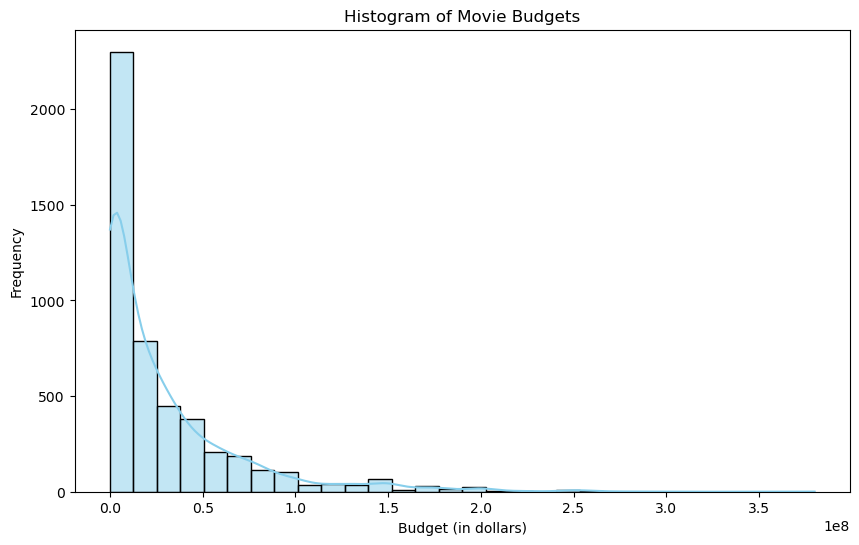

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns  # Add this line to import seaborn

# Histogram of movie budgets
plt.figure(figsize=(10, 6))
sns.histplot(data['budget'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Histogram of Movie Budgets')
plt.xlabel('Budget (in dollars)')
plt.ylabel('Frequency')
plt.show()


In [46]:
# Ensure all entries in 'genres' are strings and split by comma to extract the first genre
data['primary_genre'] = data['genres'].apply(lambda x: str(x).split(',')[0] if pd.notna(x) else 'Unknown')


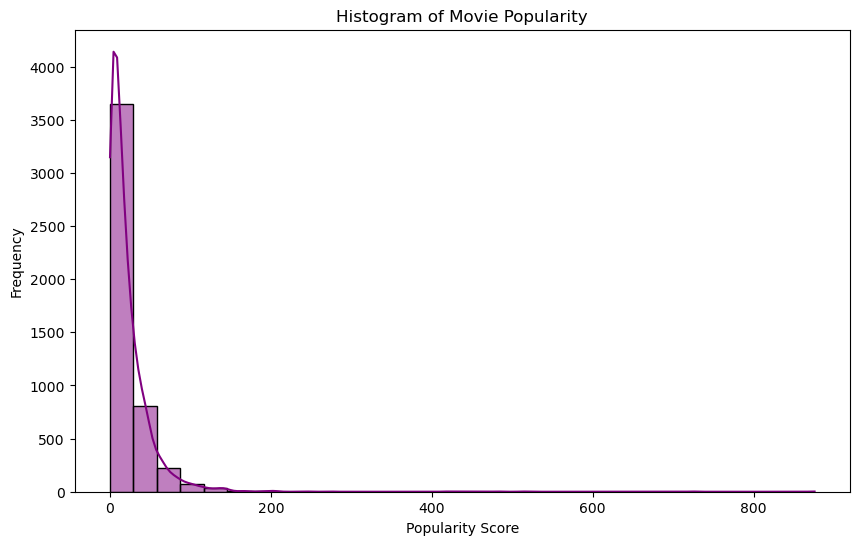

In [48]:
# Histogram of movie popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'].dropna(), bins=30, kde=True, color='purple')
plt.title('Histogram of Movie Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load your dataset into movies_df (replace 'your_file.csv' with your actual file path if loading from a CSV)
# Example: movies_df = pd.read_csv('your_file.csv')
# Make sure to replace this line with actual data loading if necessary
# movies_df = pd.read_csv('your_file.csv')

# Generate a correlation matrix (only numerical columns)
correlation_matrix = movies_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Define a threshold for recommendation based on vote_average
threshold = 7.0
movies_df['recommend'] = movies_df['vote_average'] >= threshold  # Binary target for recommendation

# Simulating predictions for the sake of confusion matrix
# Assuming a simple model based on popularity (if popularity > median, recommend)
popularity_threshold = movies_df['popularity'].median()
movies_df['predicted_recommend'] = movies_df['popularity'] > popularity_threshold

# Calculating the confusion matrix
conf_matrix = confusion_matrix(movies_df['recommend'], movies_df['predicted_recommend'], labels=[True, False])

# Display the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Recommend', 'Actual Do Not Recommend'],
                              columns=['Predicted Recommend', 'Predicted Do Not Recommend'])
print("Confusion Matrix:")
print(conf_matrix_df)


NameError: name 'movies_df' is not defined

## Cosine Similarity

In [52]:
import warnings
warnings.filterwarnings('ignore')

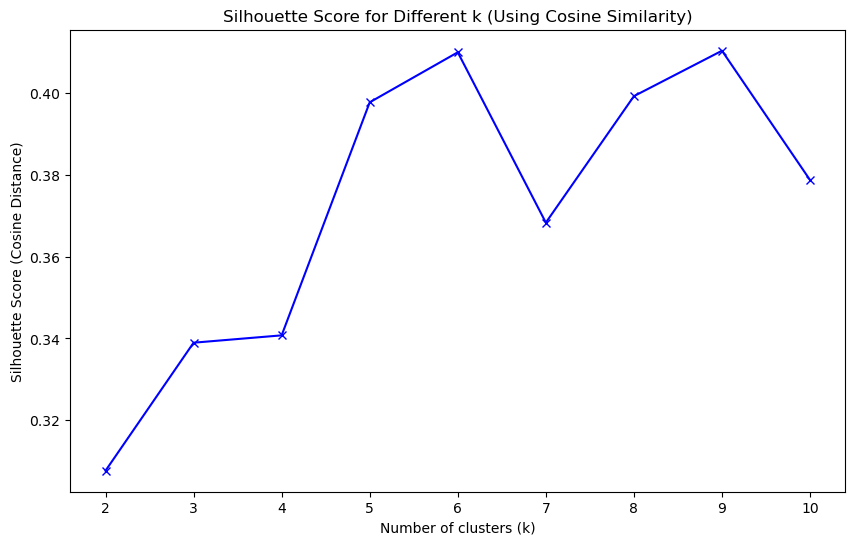

The average silhouette score is: 0.39776392189897747


In [54]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your movies data in a DataFrame
# Example: movies_cleaned = pd.read_csv('movies_cleaned.csv')
# For this example, let's create a mock DataFrame
# Replace this with your actual data loading code
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Feature4': np.random.rand(100)
}

# Convert the data dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)  # Now df is a valid input for scaling

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_features = pca.fit_transform(scaled_features)

# Determine the optimal number of clusters using silhouette scores with cosine similarity
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_features)
    
    # Calculate the silhouette score using cosine distance
    cosine_distance_matrix = cosine_distances(pca_features)
    silhouette_scores.append(silhouette_score(cosine_distance_matrix, labels, metric="precomputed"))

# Plot the silhouette scores to find the optimal k
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score (Cosine Distance)')
plt.title('Silhouette Score for Different k (Using Cosine Similarity)')
plt.show()

# Choose the optimal k (for example, let's assume it's 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_features)

# Calculate the new silhouette score with cosine distance
cosine_distance_matrix = cosine_distances(pca_features)
silhouette_avg = silhouette_score(cosine_distance_matrix, df['Cluster'], metric="precomputed")

# Display the new silhouette score
print(f"The average silhouette score is: {silhouette_avg}")


## K-MeansClustering

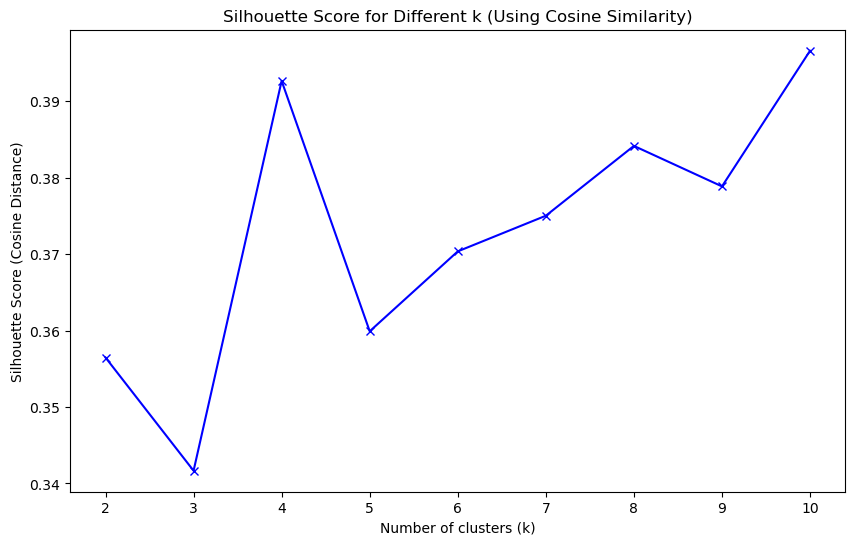

The average silhouette score for k=5 is: 0.3598995537617469


In [56]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset - replace with actual data loading code
# Example: movies_cleaned = pd.read_csv('movies_cleaned.csv')
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Feature4': np.random.rand(100)
}

# Convert data dictionary into DataFrame
df = pd.DataFrame(data)

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_features)

# Determine the optimal number of clusters using silhouette scores with cosine distance
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_features)
    
    # Calculate silhouette score using cosine distance
    cosine_distance_matrix = cosine_distances(pca_features)
    silhouette_scores.append(silhouette_score(cosine_distance_matrix, labels, metric="precomputed"))

# Plot silhouette scores to find the optimal k
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score (Cosine Distance)')
plt.title('Silhouette Score for Different k (Using Cosine Similarity)')
plt.show()

# Select the optimal k (for instance, based on the silhouette plot)
optimal_k = 5  # Replace with the chosen optimal k from the silhouette plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_features)

# Calculate and print the new silhouette score with cosine distance for optimal k
cosine_distance_matrix = cosine_distances(pca_features)
silhouette_avg = silhouette_score(cosine_distance_matrix, df['Cluster'], metric="precomputed")
print(f"The average silhouette score for k={optimal_k} is: {silhouette_avg}")


# Movie Recommendation Sytem

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_df[movies_df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_df[movies_df.index==index]['title'].values[0]
  if (i<11):
    print(i, '.',title_from_index)
    i+=1